# 개인과제2

# 1. 사용 데이터 생성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data =  pd.read_csv('/content/drive/MyDrive/wanted_pre_onboarding/pretest_data.csv')


# 2. 전처리 및 EDA



*   생성 데이터 확인




video_id : 영상의 비디오 아이디

channel_id : 영상이 업로드 되어있는 채널 아이디

published_date : 영상이 유튜브에 업로드된 날짜

category_name영상/채널의 카테고리

duration : 영상 길이 (PT1H13M25S == 1시간13분25초)

tags : 영상에 사용된 해시태그

description : 영상부연설명

on_trending_date : 인기 동영상에서 처음 포착된 날짜

off_trending_date : 인기 동영상에서 사라진 날짜

on_rank : 인기 동영상에서 처음 기록된 순위

off_rank : 인기 동영상에서 사라지기전 기록된 순위

on_views : 인기 동영상에서 처음 기록된 조회수

off_views : 인기 동영상에서 사라지기전 기록된 조회수

on_likes : 인기 동영상에서 처음 기록된 좋아요수

off_likes : 인기 동영상에서 사라지기전 기록된 좋아요수

on_dislikes : 인기 동영상에서 처음 기록된 싫어요수

off_dislikes : 인기 동영상에서 사라지기전 기록된 싫어요수

on_comments : 인기 동영상에서 처음 기록된 댓글수

off_comments : 인기 동영상에서 사라지기전 기록된 댓글수

on_channel_subscribers : 인기 동영상에서 처음 기록된 채널의 구독자수

off_channel_subscribers : 인기 동영상에서 사라지기전 기록된 채널의 구독자수

on_channel_total_views : 인기 동영상에서 처음 기록된 채널의 전체 비디오 조회수의 합

off_channel_total_views : 인기 동영상에서 사라지기전 기록된 채널의 전체 비디오 조회수의 합

on_channel_total_videos : 인기 동영상에서 처음 기록된 채널의 비디오 개수

off_channel_total_videos : 인기 동영상에서 사라지기전 기록된 채널의 비디오 개수


In [3]:
data.head(2)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70




*   데이터 정보 확인




In [4]:
data.shape, data.columns

((2644, 25),
 Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
        'tags', 'description', 'on_trending_date', 'off_trending_date',
        'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
        'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
        'on_channel_subscribers', 'off_channel_subscribers',
        'on_channel_total_views', 'off_channel_total_views',
        'on_channel_total_videos', 'off_channel_total_videos'],
       dtype='object'))

In [5]:
#결측치 확인
data.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [6]:
#결측치 제거
#다른것으로 대체하기에는 알 수 없는 부분이 많음
#data = data.fillna(0)

data = data.dropna().reset_index()
data.isnull().sum()

index                       0
video_id                    0
channel_id                  0
published_date              0
category_name               0
duration                    0
tags                        0
description                 0
on_trending_date            0
off_trending_date           0
on_rank                     0
off_rank                    0
on_views                    0
off_views                   0
on_likes                    0
off_likes                   0
on_dislikes                 0
off_dislikes                0
on_comments                 0
off_comments                0
on_channel_subscribers      0
off_channel_subscribers     0
on_channel_total_views      0
off_channel_total_views     0
on_channel_total_videos     0
off_channel_total_videos    0
dtype: int64

In [7]:
#중복값 확인
data.duplicated().sum()

0

In [8]:
data['channel_id'].duplicated().sum()

1441

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     2252 non-null   int64 
 1   video_id                  2252 non-null   object
 2   channel_id                2252 non-null   object
 3   published_date            2252 non-null   object
 4   category_name             2252 non-null   object
 5   duration                  2252 non-null   object
 6   tags                      2252 non-null   object
 7   description               2252 non-null   object
 8   on_trending_date          2252 non-null   object
 9   off_trending_date         2252 non-null   object
 10  on_rank                   2252 non-null   int64 
 11  off_rank                  2252 non-null   int64 
 12  on_views                  2252 non-null   int64 
 13  off_views                 2252 non-null   int64 
 14  on_likes                

In [10]:
#object형식의 날짜 항목 날짜로 변경
from datetime import datetime

data['published_date'] = pd.to_datetime(data['published_date'])
data['on_trending_date'] = pd.to_datetime(data['on_trending_date'])
data['off_trending_date'] = pd.to_datetime(data['off_trending_date'])


In [100]:
#Q1의 데이터 시각화를 위한 df생성 및 사용할 항목만 선택
data_q1 = data
data_q1 = data_q1[['channel_id','published_date','category_name','tags' ]]
data_q1['video'] = 1
print(data_q1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channel_id      2252 non-null   object        
 1   published_date  2252 non-null   datetime64[ns]
 2   category_name   2252 non-null   object        
 3   tags            2252 non-null   object        
 4   video           2252 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 88.1+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#data_q1['published_date'].unique()
#새로운 항목생성 published_date기준 month : 월별 / week :주별
data_q1['month'] = data_q1['published_date'].dt.month
data_q1['week'] = data_q1['published_date'].dt.weekofyear



In [13]:
data_q1.tail(2)

,channel_id,published_date,category_name,tags,video,month,week
2250,CHYeeEw,2021-04-26,Entertainment,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...,1,4,17
2251,CHuhAUM,2021-06-02,Music,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,1,6,22


Q1. 데이터 타입별 시각화 (자유양식)

*   전체기간 카테고리 -> 채널 -> 비디오 개수
*   월별 카테고리 -> 채널 -> 비디오 개수
*   월별 TOP10 채널 (분류 기준은 비디오 개수)
*   주별 TOP5 채널 (분류 기준은 비디오 개수)
*   월별 카테고리별 태그 키워드 순위


*   전체기간 카테고리 -> 채널 -> 비디오 개수

In [14]:
data_q1['category_name'].unique()

array(['Entertainment', 'Sports', 'Music', 'People & Blogs',
       'Science & Technology', 'Howto & Style', 'News & Politics',
       'Gaming', 'Comedy', 'Pets & Animals', 'Travel & Events',
       'Education', 'Film & Animation', 'Autos & Vehicles',
       'Nonprofits & Activism'], dtype=object)

In [15]:
data_q1['month'].unique()

array([7, 6, 4, 5, 3])

In [16]:
data_q1['week'].unique()

array([26, 25, 22, 27, 17, 30, 14, 23, 21, 20, 16, 19, 29, 24, 18, 28, 15,
       13, 12])

In [17]:
df_category_channel_sum = pd.DataFrame(data_q1.groupby('category_name')['video'].sum())
df_category_channel_sum = df_category_channel_sum.sort_values(by='video' ,ascending=False).reset_index()
df_category_channel_sum

,category_name,video
0,Entertainment,845
1,People & Blogs,281
2,Sports,208
3,Music,201
4,News & Politics,150
5,Comedy,146
6,Howto & Style,100
7,Gaming,70
8,Film & Animation,67
9,Education,53


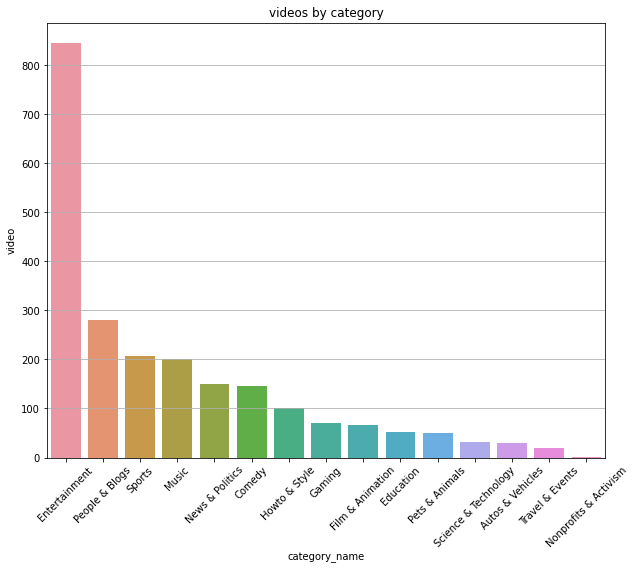

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
plt.grid()
plt.title('videos by category')
sns.barplot(x = 'category_name', y = 'video', data = df_category_channel_sum)
plt.xticks(fontsize=10, rotation=45)
plt.show()


*   월별 카테고리 -> 채널 -> 비디오 개수

In [19]:
data_q1_month = pd.DataFrame(data_q1.groupby(['month', 'category_name'])['video'].sum()).reset_index()
#data_q1_month = data_q1_month.sort_values(by='month' ,ascending=True).reset_index()
data_q1_month

,month,category_name,video
0,3,Comedy,4
1,3,Education,2
2,3,Entertainment,26
3,3,Film & Animation,2
4,3,Gaming,1
...,...,...,...
64,7,People & Blogs,61
65,7,Pets & Animals,17
66,7,Science & Technology,8
67,7,Sports,61


In [20]:
def cat_month(c) :
  return(data_q1_month[data_q1_month['month'] == c].sort_values(by='video' ,ascending=False))

In [21]:
dfs_cat = []
for i in range(3,8):
    df = pd.DataFrame(cat_month(i))
    dfs_cat.append(df)

In [22]:
dfs_cat[0]

,month,category_name,video
2,3,Entertainment,26
8,3,People & Blogs,12
7,3,News & Politics,7
0,3,Comedy,4
11,3,Sports,4
6,3,Music,3
1,3,Education,2
3,3,Film & Animation,2
5,3,Howto & Style,2
4,3,Gaming,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 432x288 with 0 Axes>

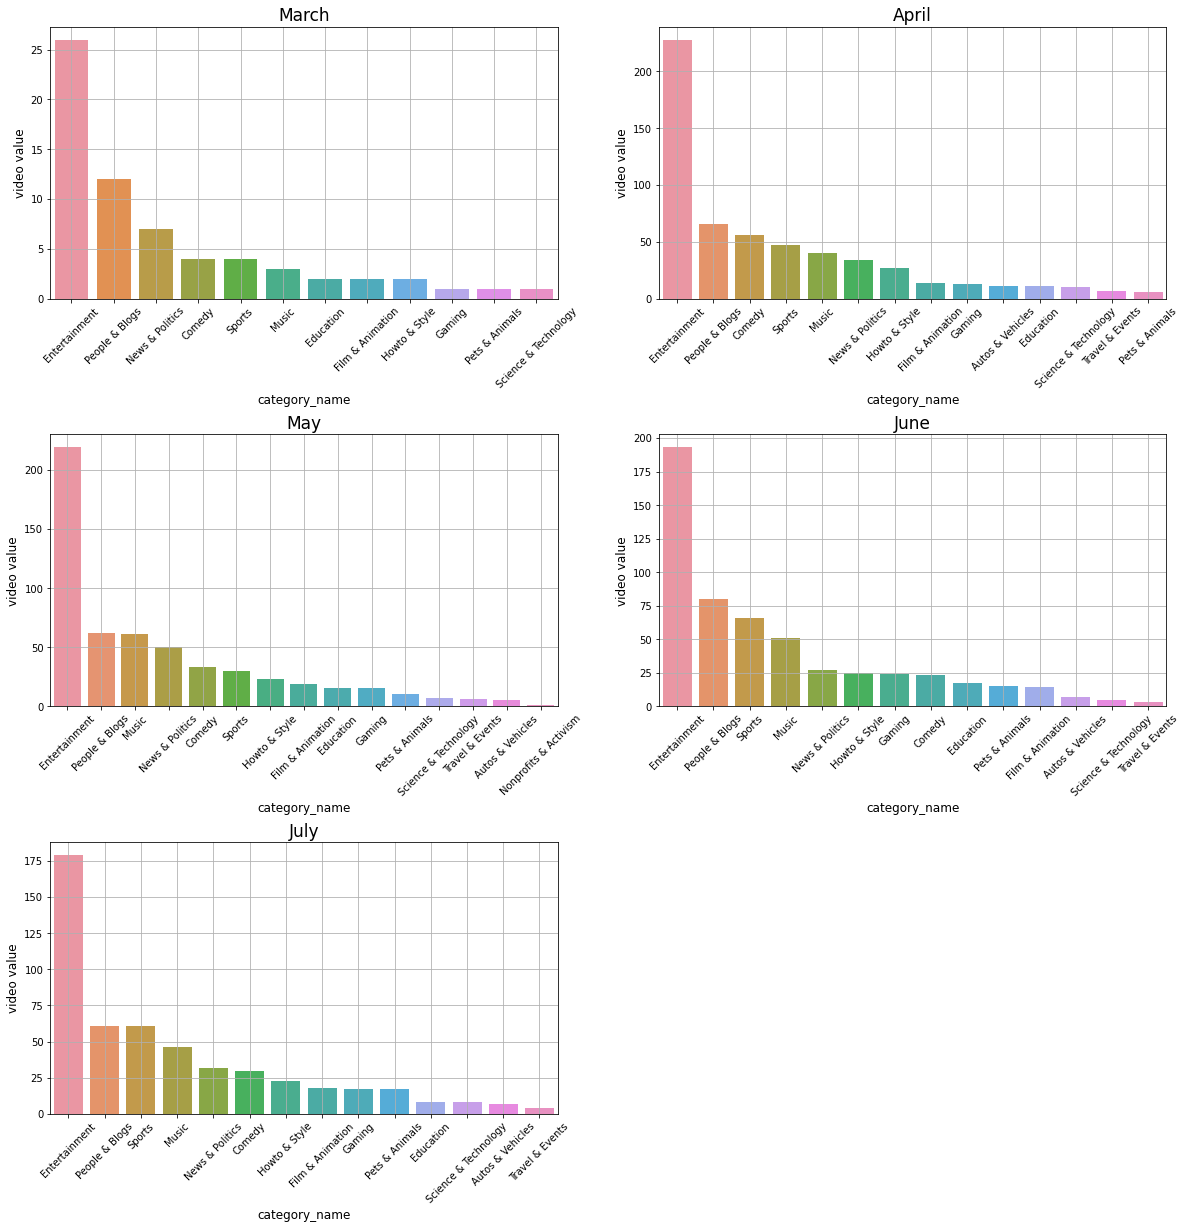

In [23]:
plt.suptitle('category per month', fontsize = 15)
plt.figure(figsize=(20,20))
mo = ['March', 'April', 'May', 'June', 'July']
for n in range(0,5):
  plt.subplots_adjust( hspace=0.5)
  plt.subplot(3, 2, n+1)
  sns.barplot(dfs_cat[n]['category_name'],dfs_cat[n]['video'])
  plt.title(mo[n], fontsize = 17)
  plt.xlabel('category_name', fontsize = 12)
  plt.xticks(fontsize=10, rotation=45)
  plt.ylabel('video value', fontsize = 12)
  plt.grid()
plt.show()

*   월별 TOP10 채널 (분류 기준은 비디오 개수)

In [24]:
data_q1_top10 = pd.DataFrame(data_q1.groupby(['month', 'channel_id'])['video'].sum()).reset_index()
data_q1_top10


,month,channel_id,video
0,3,CH12YJZ,1
1,3,CH2qVOO,1
2,3,CH46BbE,2
3,3,CH4LW3s,1
4,3,CH5BMQO,2
...,...,...,...
1427,7,CHzCedB,3
1428,7,CHzIOIS,1
1429,7,CHzgNzU,2
1430,7,CHzxXBQ,1


In [25]:
def month(m) :
  return(data_q1_top10[data_q1_top10['month'] == m]).nlargest(10,"video")


In [26]:
dfs_ms = []
for i in range(3,8):
    df = pd.DataFrame(month(i))
    dfs_ms.append(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 432x288 with 0 Axes>

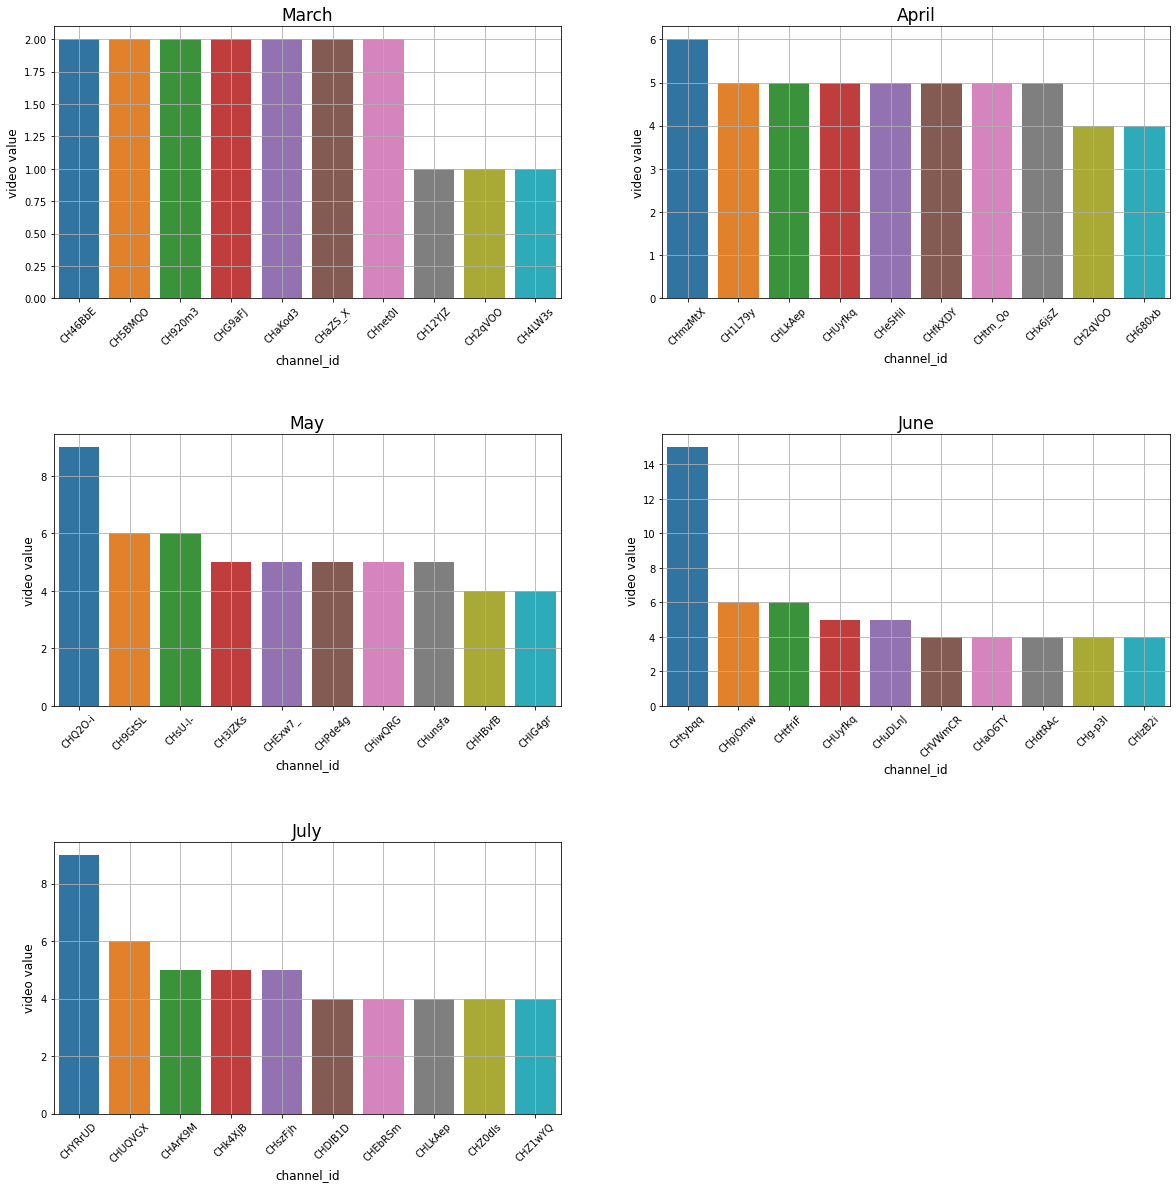

In [27]:
plt.suptitle('videos per month', fontsize = 15)
plt.figure(figsize=(20,20))
mo = ['March', 'April', 'May', 'June', 'July']
for n in range(0,5):
  plt.subplots_adjust( hspace=0.5)
  plt.subplot(3, 2, n+1)
  sns.barplot(dfs_ms[n]['channel_id'],dfs_ms[n]['video'])
  plt.title(mo[n], fontsize = 17)
  plt.xlabel('channel_id', fontsize = 12)
  plt.xticks(fontsize=10, rotation=45)
  plt.ylabel('video value', fontsize = 12)
  plt.grid()
plt.show()

*   주별 TOP5 채널 (분류 기준은 비디오 개수)


In [28]:
data_q1_top5 = pd.DataFrame(data_q1.groupby(['week', 'channel_id'])['video'].sum()).reset_index()
data_q1_top5
             

,week,channel_id,video
0,12,CH2qVOO,1
1,12,CH7Krez,1
2,12,CHCA4-e,1
3,12,CHGiqkg,1
4,12,CHIY5oU,1
...,...,...,...
1934,30,CHrhgVH,1
1935,30,CHt_UFh,1
1936,30,CHta_NR,1
1937,30,CHyn7ao,1


In [29]:
data_q1_top5['week'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30])

In [30]:
def week(m) :
  return(data_q1_top5[data_q1_top5['week'] == m]).nlargest(5,"video")

In [31]:
dfs_ws = []
for i in range(12,31):
    df = pd.DataFrame(week(i))
    dfs_ws.append(df)

In [32]:
dfs_ws[18]

,week,channel_id,video
1913,30,CHYRrUD,5
1884,30,CH-FQUI,3
1923,30,CHcQTRi,3
1899,30,CHDIB1D,2
1912,30,CHUQVGX,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 432x288 with 0 Axes>

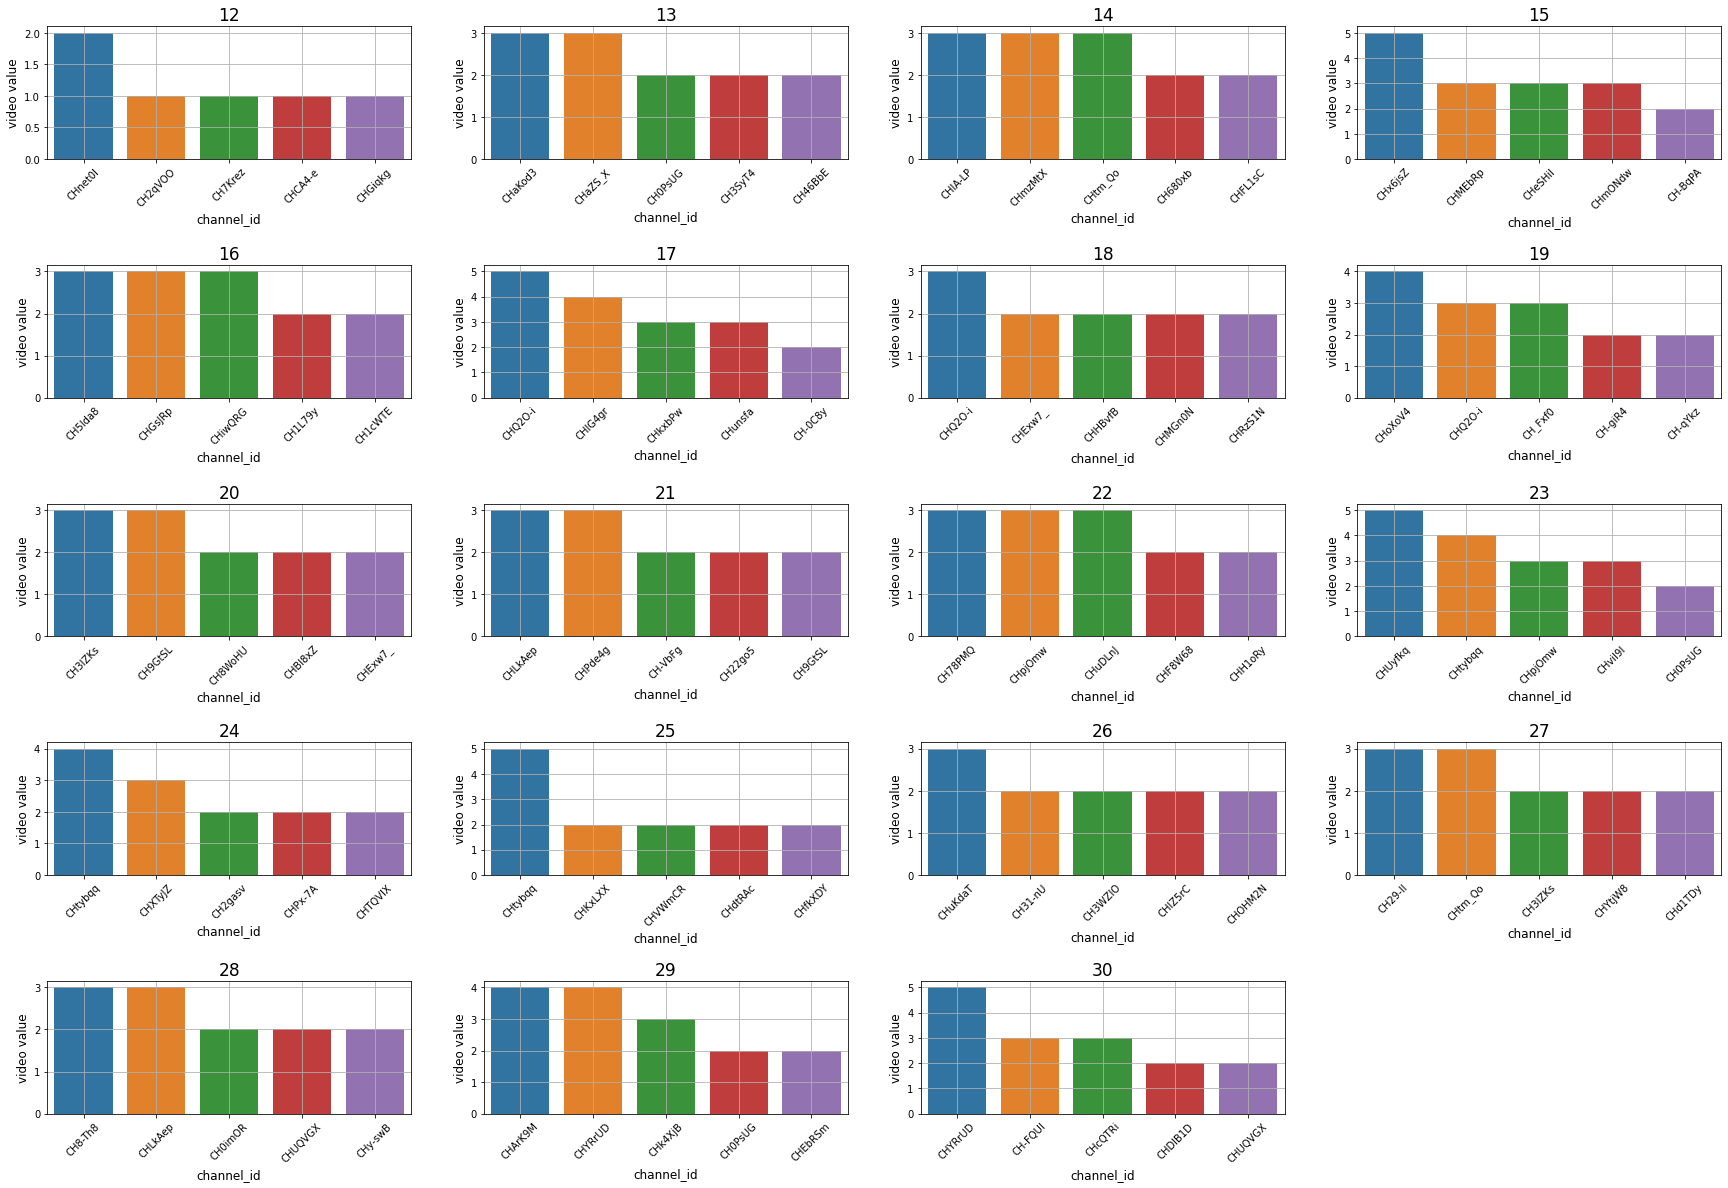

In [33]:
plt.suptitle('videos per week', fontsize = 15)
plt.figure(figsize=(30,20))
for n in range(0,19):
  plt.subplots_adjust( hspace=0.8)
  plt.subplot(5, 4, n+1)
  sns.barplot(dfs_ws[n]['channel_id'],dfs_ws[n]['video'])
  plt.title(n+12, fontsize = 17)
  plt.xlabel('channel_id', fontsize = 12)
  plt.xticks(fontsize=10, rotation=45)
  plt.ylabel('video value', fontsize = 12)
  plt.grid()
plt.show()

*   월별 카테고리별 태그 키워드 순위

In [34]:
data_q1_tag = pd.DataFrame(data_q1.groupby(['month','category_name'])['tags'].sum()).reset_index()
data_q1_tag = data_q1_tag[['month','category_name', 'tags']]


In [35]:
data_q1_tag['tags_list'] = data_q1_tag.tags.apply(lambda x: x.split('|') )
data_q1_tag = data_q1_tag.drop('tags', axis=1)
data_q1_tag

,month,category_name,tags_list
0,3,Comedy,"[#깨방정, #정승빈, #몰카, #미녀, #개그맨, #존잘남, #존예녀, #디스코,..."
1,3,Education,"[조승연, 조승연의 탐구생활, 조승연작가, 조승연 작가, 럭키, 럭키 인디아, 럭키..."
2,3,Entertainment,"[아이유, 아이유 신곡, 아이유 코인, 아이유 라일락, 코인, 라일락, 아이유 노래..."
3,3,Film & Animation,"[고민툰, 사연툰, 썰툰, 사이다툰, 영상툰, animation, animation..."
4,3,Gaming,"[리그오브레전드, 리그 오브 레전드, LoL, Leagueoflegends, Lea..."
...,...,...,...
64,7,People & Blogs,"[브이로그, 커플vlog, 부부, 유혜주타투, 타투이스트, 냐아, 으냐, 단하나, ..."
65,7,Pets & Animals,"[실험영상, 조개, 민물조개, 납자루, 어항, 물생활, 물고기키우기, 생물, 관찰,..."
66,7,Science & Technology,"[4K, 4K 모니터, 주연테크, 가성비 모니터, 갓성비, 4K 모니터 입문용, 입..."
67,7,Sports,"[이천수, 심판도전기, 축구심판SPOTV, 스포티비, 아르헨티나, 브라질, 코파, ..."


In [39]:
test = data_q1_tag[(data_q1_tag['month'] == 3) & (data_q1_tag['category_name'] == 'Entertainment')]
test

,month,category_name,tags_list
2,3,Entertainment,"[아이유, 아이유 신곡, 아이유 코인, 아이유 라일락, 코인, 라일락, 아이유 노래..."


In [46]:
tag_list_vector = []
for i in test['tags_list']:
    length = len(i)
    for j in range(length):
        tag_list_vector.append(i[j])
        

In [51]:
trend_with_tags = pd.DataFrame(tag_list_vector)[pd.Series(tag_list_vector) != '[none]'].value_counts()
#tag_list_vector.remove('[none]')
#trend_with_tags = trend_with_tags[trend_with_tags.values >= 5]
trend_with_tags

idol      3
eng       3
아이유       3
유재석       3
의리        2
         ..
대전부르스     1
대전광역시     1
대전 부르스    1
대식가       1
히밥 먹방     1
Length: 469, dtype: int64

월별 카테고리별 태그 키워드 순위는 제대로 구현하지 못함.

Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이 있음 ex) views, likes, dislikes, comments,...



*   비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 항목 추가지표를 개발하고 
*   이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.





In [55]:
pd.options.display.float_format = '{:.4f}'.format

In [85]:
data_q2 = data[['video_id','channel_id','category_name', 'on_trending_date', 'off_trending_date', 'on_views', 'off_views']]
data_q2.head(2)

,video_id,channel_id,category_name,on_trending_date,off_trending_date,on_views,off_views
0,V-0db,CH49ta0,Entertainment,2021-07-03,2021-07-04,1659484,1912983
1,V-1XL,CHZVD--,Entertainment,2021-06-26,2021-06-27,293559,374698


In [ ]:
data_q2['trend_dt'] = (data_q2['off_trending_date'] - data_q2['on_trending_date']).dt.days
data_q2['views'] = data_q2['off_views'] - data_q2['on_views']


In [87]:
data_q2 = data_q2[['video_id','channel_id','category_name','trend_dt', 'views']]
data_q2 = data_q2[(data_q2['trend_dt'] > 0) &(data_q2['views'] > 0)]
data_q2

,video_id,channel_id,category_name,trend_dt,views
0,V-0db,CH49ta0,Entertainment,1,253499
1,V-1XL,CHZVD--,Entertainment,1,81139
3,V-5jn,CHhI3EX,Sports,1,198079
5,V-8SN,CHtCiO5,Music,1,172396
8,V-FNv,CH1cWTE,Entertainment,1,89034
...,...,...,...,...,...
2243,VzpLm,CHgeeQu,Entertainment,1,28673
2244,VzqMG,CH1EiHI,People & Blogs,2,214933
2245,VzsVd,CHknfGX,People & Blogs,1,56394
2247,VzwuB,CH69uMh,Comedy,3,827821


In [88]:
data_q2['views_per_day'] = (data_q2['views']/data_q2['trend_dt'])
data_q2.sort_values('views_per_day', ascending=False)

,video_id,channel_id,category_name,trend_dt,views,views_per_day
1174,VWMwe,CH3IZKs,Music,7,151599599,21657085.5714
1321,V_yso,CHaO6TY,Music,3,45340862,15113620.6667
510,VCukl,CH3IZKs,Music,6,90563597,15093932.8333
1199,VXA2Y,CHaO6TY,Music,4,46889585,11722396.2500
924,VOOMx,CH3IZKs,Music,3,22925634,7641878.0000
...,...,...,...,...,...,...
426,VAtKV,CHbMjg2,News & Politics,1,14531,14531.0000
420,VAkSP,CHXIF1a,Music,1,14383,14383.0000
251,V665l,CHZ0dIs,Comedy,1,13484,13484.0000
1457,Ve3Sj,CH66yQ1,Music,2,21173,10586.5000


In [90]:
like_df = data[['video_id','channel_id','on_likes', 'off_likes']]


In [ ]:
like_df['likes'] = like_df['off_likes'] - like_df['on_likes']

In [92]:
like_df = like_df[['video_id','channel_id','likes']]
like_df.head(2)

,video_id,channel_id,likes
0,V-0db,CH49ta0,12200
1,V-1XL,CHZVD--,1044


In [93]:
like_df.nlargest(10,"likes",keep='all')

,video_id,channel_id,likes
1174,VWMwe,CH3IZKs,7662752
510,VCukl,CH3IZKs,5643420
924,VOOMx,CH3IZKs,1909420
2227,VzFT3,CH3IZKs,1882537
669,VH12S,CHLkAep,1584701
1601,ViLyc,CH3IZKs,1290152
2046,Vujf3,CHLkAep,1014339
1321,V_yso,CHaO6TY,524026
539,VDbXM,CHLkAep,459513
1080,VT7lh,CHLkAep,435803


<Figure size 432x288 with 0 Axes>

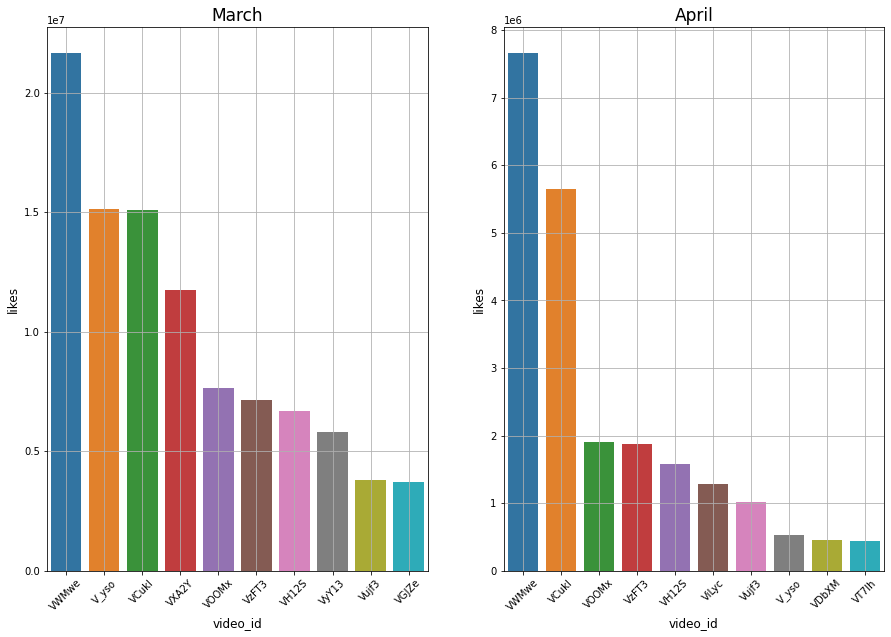

In [99]:
plt.suptitle('favorite video')
plt.figure(figsize=(15,10))
like = ['views_per_day', 'likes']
df_like = [data_q2, like_df]
for n in range(0,2):
  plt.subplots_adjust( hspace=0.5)
  plt.subplot(1, 2, n+1)
  sns.barplot(x = 'video_id', y = like[n] , data = df_like[n].nlargest(10,like[n],keep='all'))
  plt.title(mo[n], fontsize = 17)
  plt.xlabel('video_id', fontsize = 12)
  plt.xticks(fontsize=10, rotation=45)
  plt.ylabel('likes', fontsize = 12)
  plt.grid()
plt.show()

The new metric is the difference between (on_trending_date) and (off_trending_date) divided by the difference in views over the same period.
As a result of comparing likes in the same period, it was found that 7 overlapped images in the top 10 images.
Therefore, it was found that the higher the number of daily views, the higher the engagement of the viewers.

Q3. Q1, Q2의 답을 자유양식으로 작성 후 PDF로 변환하여 첨부
(영어로 작성 선호하지만 선택 사항임)